<a href="https://colab.research.google.com/github/Semantika-Roy/Classification-of-Breast-Cancer-using-Neural-Networks/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn. ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = "/content/drive/MyDrive/Datasets/Kaggle/breast-cancer.csv"
df = pd.read_csv(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
new_df = df
new_df['diagnosis'] = new_df['diagnosis'].replace({'M':1, 'B':0})
new_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#Checking for null values
null_values = df.isnull().sum()
print(null_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


The visualization below indicates that there are more number of **Benign tumors as compared to Malignant tumors** in the population considered for biopsy.

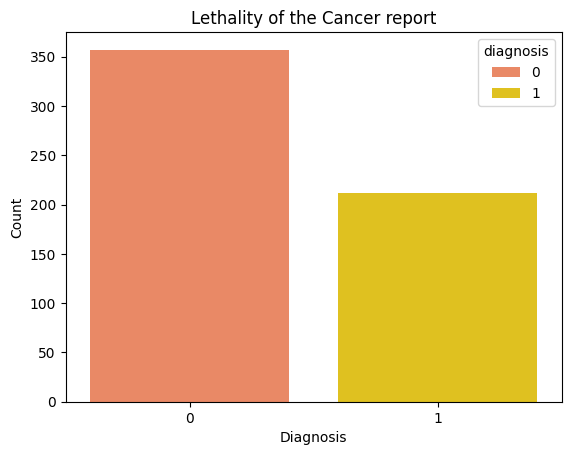

In [ ]:
sns.countplot(data = df, x = 'diagnosis', hue = 'diagnosis', palette = ['coral', 'gold'])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Lethality of the Cancer report")
plt.show()

**Mean radius analysis between the two groups** which suggests that the **average radius of Malignant tumors is higher as compared to Benign tumors**. A higher radius mean value can indicate towards the **cells having larger nuclei** which is a key characteristic in diagnosing cancer reflecting an **increased likelihood of malignancy**

In [ ]:
total_mean_radius = df.groupby('diagnosis')['radius_mean'].mean()
total_mean_radius.reset_index()

,diagnosis,radius_mean
0,0,12.146524
1,1,17.462830


A graphical representation of the above performed **Mean radius analysis**

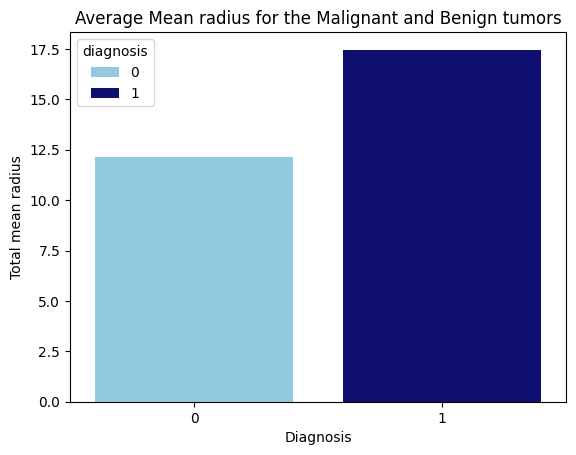

In [ ]:
total_mean_radius = df.groupby('diagnosis')['radius_mean'].mean().reset_index()

sns.barplot(data = total_mean_radius, x = 'diagnosis', y = 'radius_mean', hue = 'diagnosis', palette = ['skyblue', 'navy'])
plt.xlabel("Diagnosis")
plt.ylabel("Total mean radius")
plt.title("Average Mean radius for the Malignant and Benign tumors")
plt.show()

Through the **Logistic Regression Curve** below, it can be interpreted that the **likelihood of Malignancy increases with increase in Texture Mean**

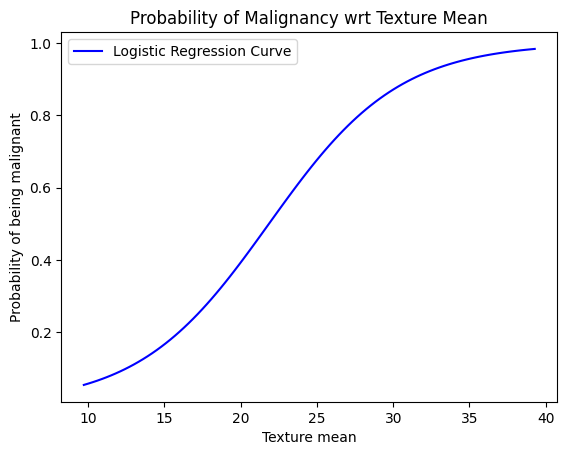

In [ ]:
x = df[['texture_mean']]
y = df['diagnosis']

model = LogisticRegression()
model.fit(x, y)

x_range = np.linspace(start = df['texture_mean'].min(), stop = df['texture_mean'].max(), num = 100).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[ : , 1] #Extracting only the probability of being malignant (class 1)

plt.plot(x_range, y_prob, color = 'b', label = 'Logistic Regression Curve')
plt.xlabel("Texture mean")
plt.ylabel("Probability of being malignant")
plt.title("Probability of Malignancy wrt Texture Mean")
plt.legend()
plt.show()



The **blue curve represents the density distribution of concavity mean for Benign tumors with the peak of the curve being much higher and closer to 0.0** than the **red curve for Malignant tumors** indcating that **most Benign tumors have much lower concavity mean**. This means that the **Benign tumors have less concave features** on their cell surfaces

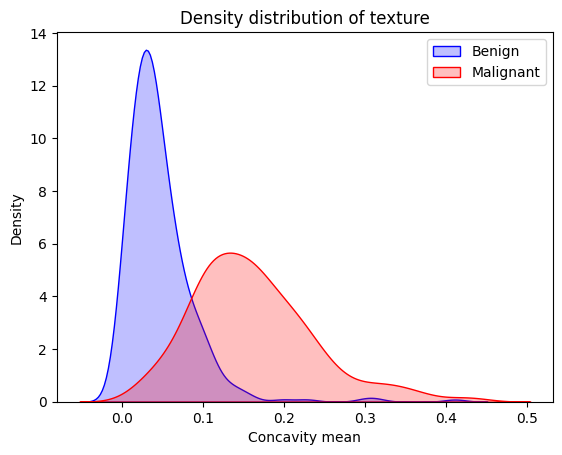

In [ ]:
sns.kdeplot(data = new_df[new_df['diagnosis']==0], x = 'concavity_mean', color = 'blue', fill = True, label = "Benign")
sns.kdeplot(data = new_df[new_df['diagnosis']==1], x = 'concavity_mean', color = 'red', fill = True, label = "Malignant")
plt.xlabel("Concavity mean")
plt.ylabel("Density")
plt.title("Density distribution of texture")
plt.legend()
plt.show()

**Mean maximum-area analysis** between the two groups to compare the maximum area records of both the type of tumors

In [ ]:
ar_worst_plot = df.groupby('diagnosis')["area_worst"].mean().reset_index()
ar_worst_plot

,diagnosis,area_worst
0,0,558.899440
1,1,1422.286321


The **Stripplot** below proves that **maximum area values for Malignant type is higher** as compared to Benign type as **Malignant cells in general have larger nuclei** since they tend to **grow uncontrollably resulting in abnormal cell size**

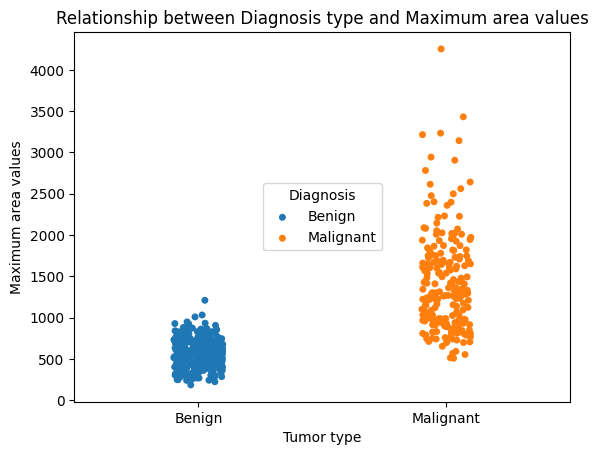

In [ ]:
sns.stripplot(data = new_df, x = "diagnosis", y = "area_worst", hue = "diagnosis")
plt.xlabel("Tumor type")
plt.ylabel("Maximum area values")
plt.title("Relationship between Diagnosis type and Maximum area values")
plt.legend(title = "Diagnosis", labels = ["Benign", "Malignant"], loc = "center")
plt.xticks(ticks = [0, 1], labels = ["Benign", "Malignant"])
plt.show()

The graphical representation below proves that **Malignant tumors** record to have **higher maximum perimeter values**

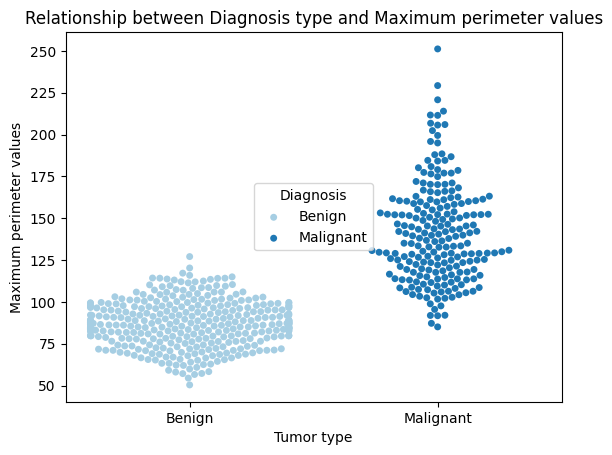

In [ ]:
sns.swarmplot(data = new_df, x = "diagnosis", y = "perimeter_worst", hue = "diagnosis", palette = "Paired")
plt.xlabel("Tumor type")
plt.ylabel("Maximum perimeter values")
plt.title("Relationship between Diagnosis type and Maximum perimeter values")
plt.legend(title = "Diagnosis", labels = ["Benign", "Malignant"], loc = "center")
plt.xticks(ticks = [0, 1], labels = ["Benign", "Malignant"])
plt.show()

Using **Pearson's Correlation** to observe the correlated features

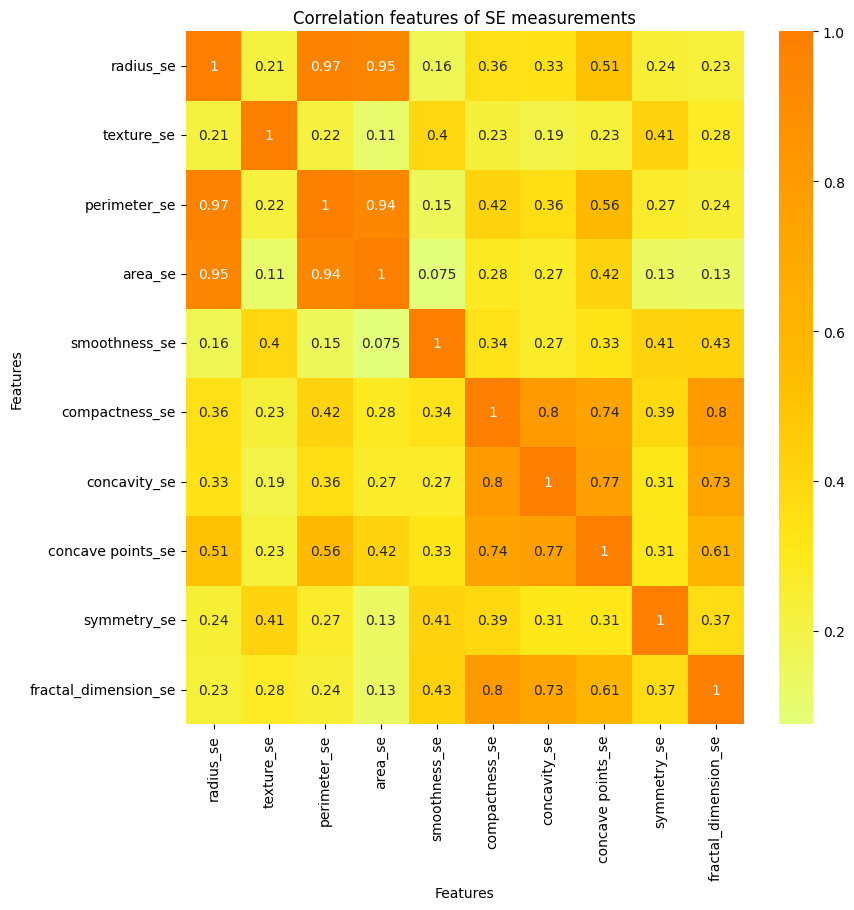

In [ ]:
se_cols = new_df.filter(items = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'])
cor = se_cols.corr()
plt.figure(figsize = (9, 9))
sns.heatmap(cor, annot = True, cmap = 'Wistia', fmt = ".2g")
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation features of SE measurements")
plt.show()

The plot below helps us understand if malignant and benign tumors have different **Standard Error** values for all features and if there are outliers

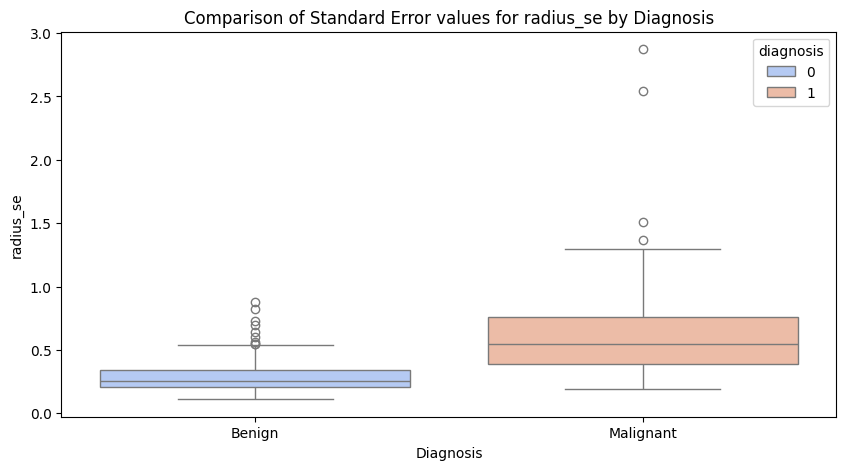

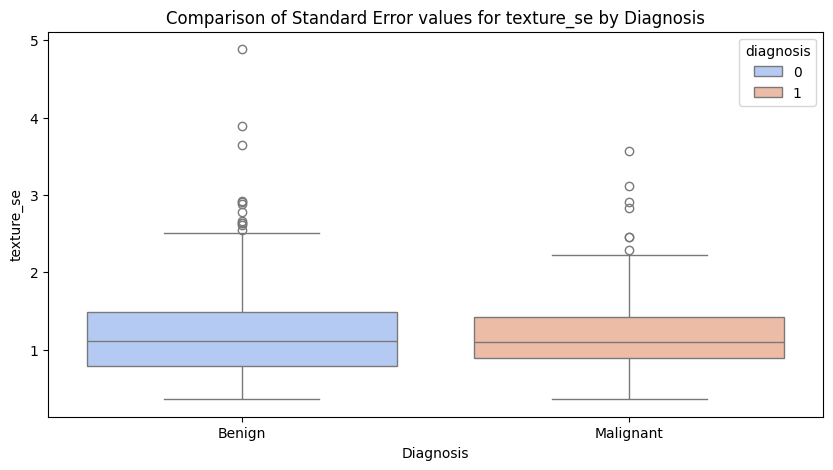

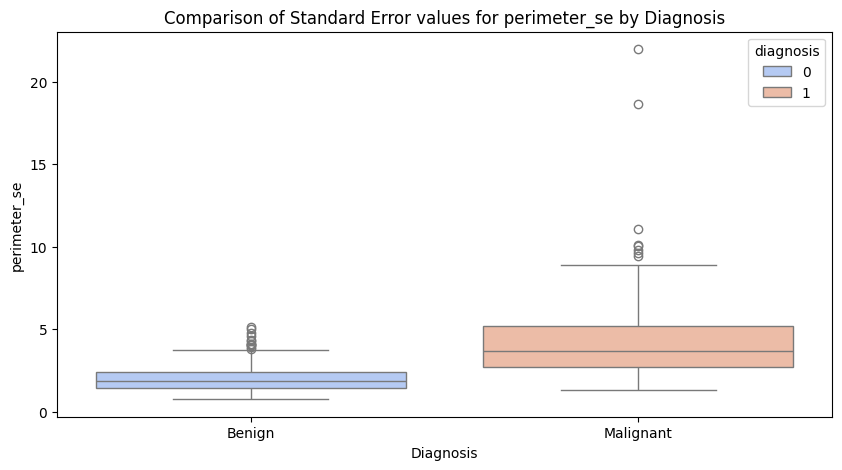

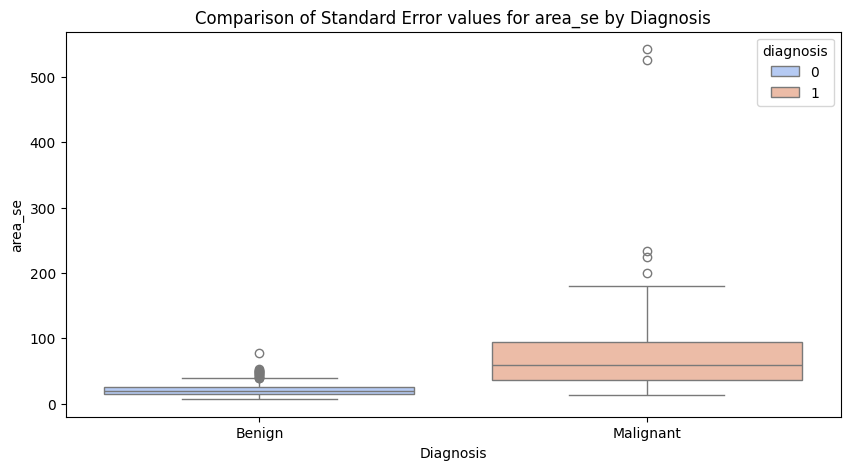

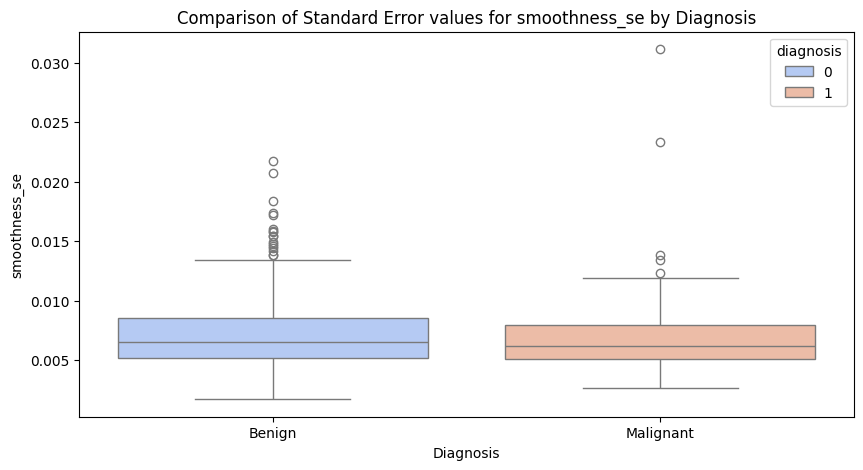

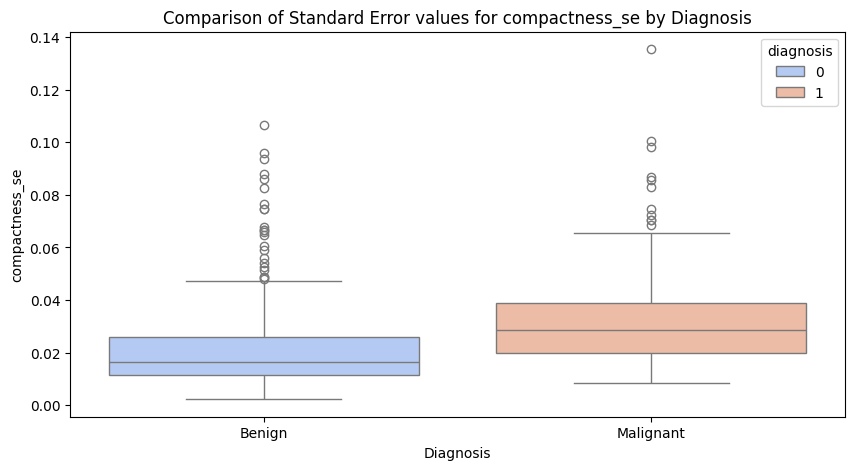

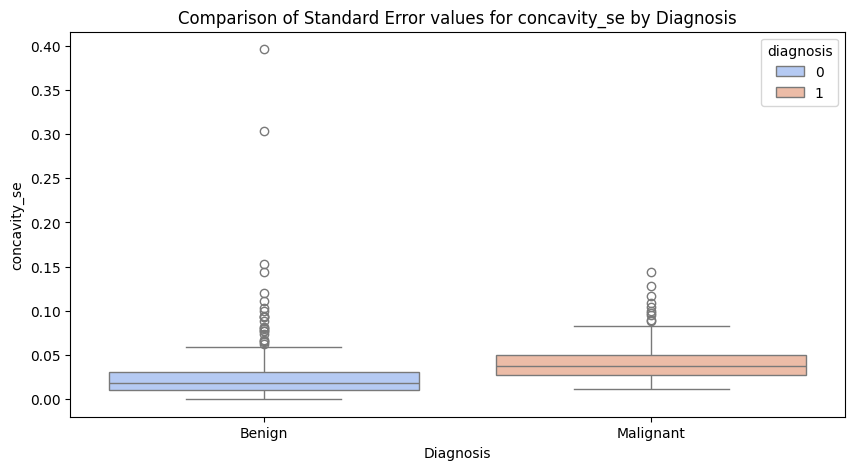

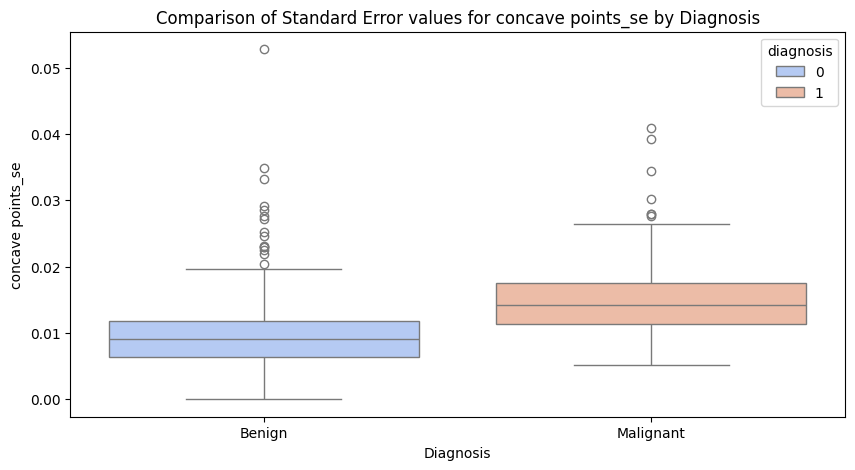

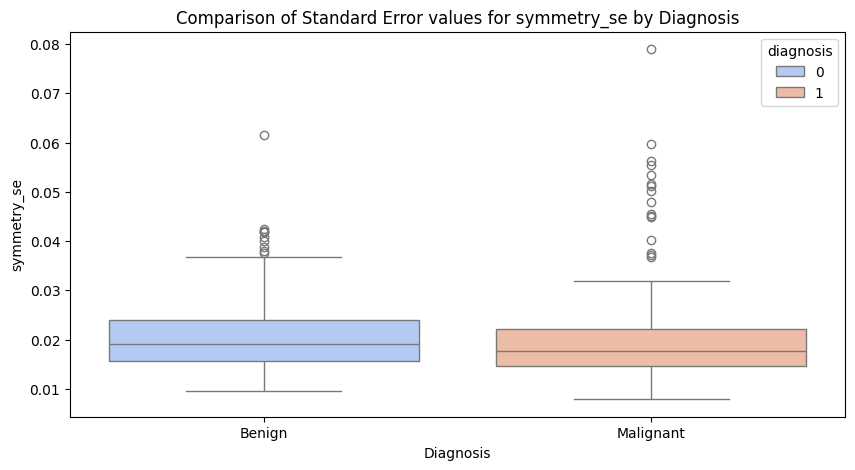

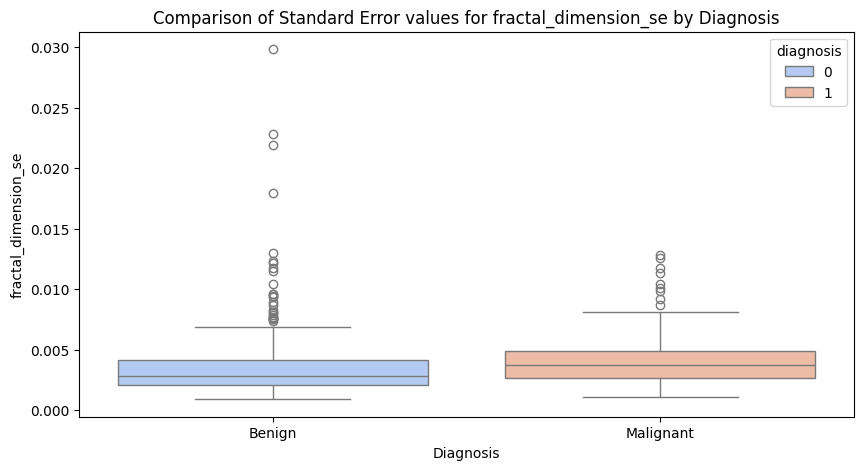

In [ ]:
se_cols2 = new_df.filter(items = ['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se'])
for col in se_cols2.columns:
  if col == 'diagnosis':
    continue
  else:
    plt.figure(figsize = (10, 5))
    sns.boxplot(data = se_cols2, x = 'diagnosis', y = col, hue = 'diagnosis', palette = "coolwarm")
    plt.title(f"Comparison of Standard Error values for {col} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.xticks(ticks = [0, 1], labels = ['Benign', 'Malignant'])
    plt.ylabel(f"{col}")
    plt.show()

**Train Test split**

In [ ]:
df2 = new_df.drop('diagnosis', axis = 1)
target = new_df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size = 0.2, random_state = 30)

**Feature Selection using Information Gain technique**

In [ ]:
mutual_info_score = mutual_info_classif(X_train, y_train)
mutual_info_score

array([0.11210944, 0.36083745, 0.08382783, 0.3875275 , 0.35575182,
       0.08193858, 0.22596127, 0.35631244, 0.4528174 , 0.0698089 ,
       0.00651145, 0.24681156, 0.        , 0.24505583, 0.34844999,
       0.01719469, 0.04640519, 0.13010502, 0.11201349, 0.03632867,
       0.04856441, 0.45615581, 0.09470747, 0.47063929, 0.45857913,
       0.10305207, 0.22991756, 0.30112416, 0.43351105, 0.09915416,
       0.08122484])

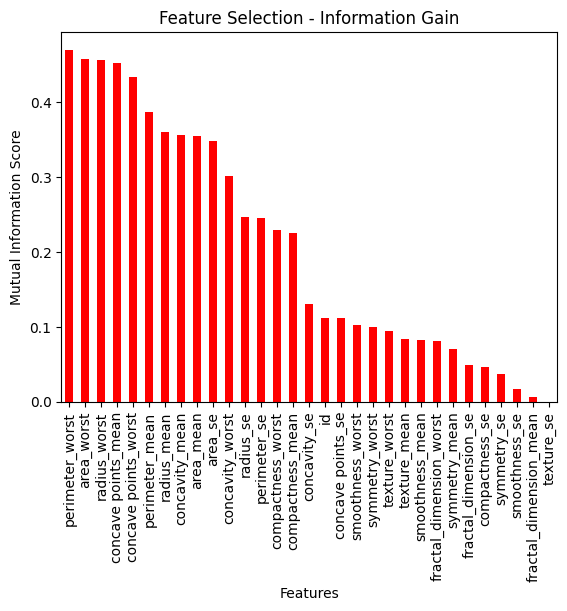

<Figure size 1000x1000 with 0 Axes>

In [ ]:
mutual_info_score = pd.Series(mutual_info_score, index = X_train.columns, name = "Mutual Information Score assigned")
mutual_info_score.sort_values(ascending = False).plot(kind = "bar", color = 'r')
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.title("Feature Selection - Information Gain")
plt.figure(figsize = (10, 10))
plt.show()

**Random Forest**

In [ ]:
max_acc = 0

for i in range(100):
  model = RandomForestClassifier(random_state = i)
  model.fit(X_train, y_train)
  y_pred_rf = model.predict(X_test)
  current_acc = round(accuracy_score(y_test, y_pred_rf)*100, 2)
  if current_acc > max_acc:
    max_acc = current_acc
    best_rs = i

model = RandomForestClassifier(random_state = best_rs)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
rf_score = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print("The Accuracy score of the model achieved using Random Forest is: ", rf_score)

The Accuracy score of the model achieved using Random Forest is:  96.49


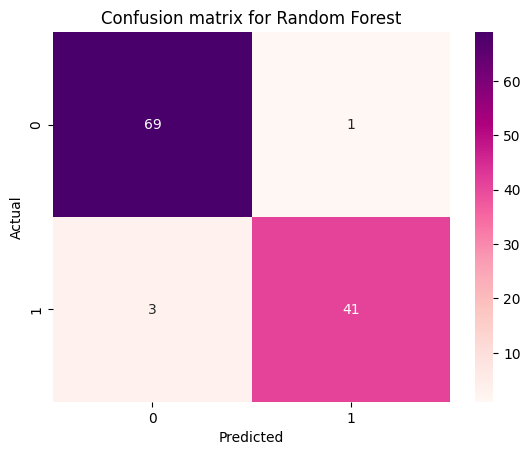

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = "RdPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for Random Forest")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.98      0.93      0.95        44

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**Building Neural Network**

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
#Setting up the layers of Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(31,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4011 - loss: 1.3010 - val_accuracy: 0.5217 - val_loss: 0.7674
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4974 - loss: 0.8771 - val_accuracy: 0.7174 - val_loss: 0.5203
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6964 - loss: 0.5920 - val_accuracy: 0.8478 - val_loss: 0.3777
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8423 - loss: 0.4190 - val_accuracy: 0.8913 - val_loss: 0.2993
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8973 - loss: 0.3175 - val_accuracy: 0.9130 - val_loss: 0.2519
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9172 - loss: 0.2552 - val_accuracy: 0.9130 - val_loss: 0.2224
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9270 - loss: 0.2148 - val_accuracy: 0.9130 - val_loss: 0.2022
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9363 - loss: 0.1875 - val_accuracy: 0.9348 - val_l

**A graphical representation of accuracy and loss**

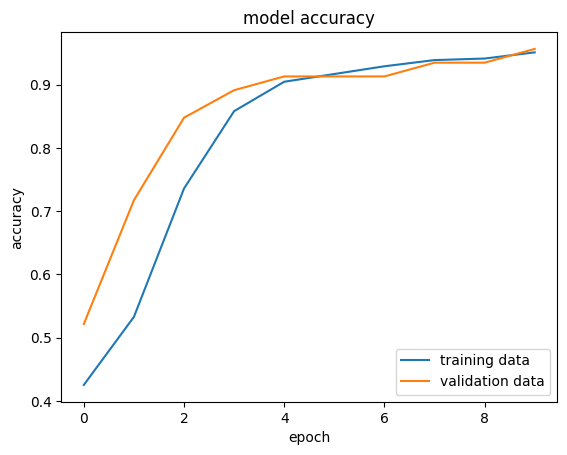

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

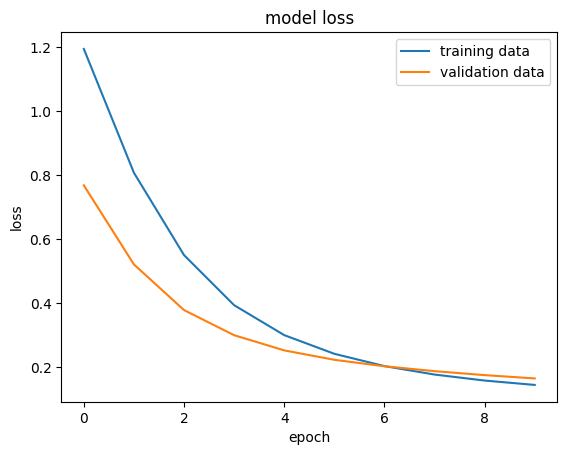

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9143 - loss: 0.1644 
0.9210526347160339


In [ ]:
y_pred_ann = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
#Converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred_ann]
print(y_pred_labels)

[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


In [ ]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563, 0.0) # Added a missing value
#change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 1):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0. 1.]]
[1]
The tumor is Malignant


In [ ]:
ann_score = round(accuracy_score(y_test, y_pred_labels)*100, 2)
print(f"The Accuracy score of the model achieved using KNN is: {ann_score}")

The Accuracy score of the model achieved using KNN is: 92.11


In [ ]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.91      0.89      0.90        44

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



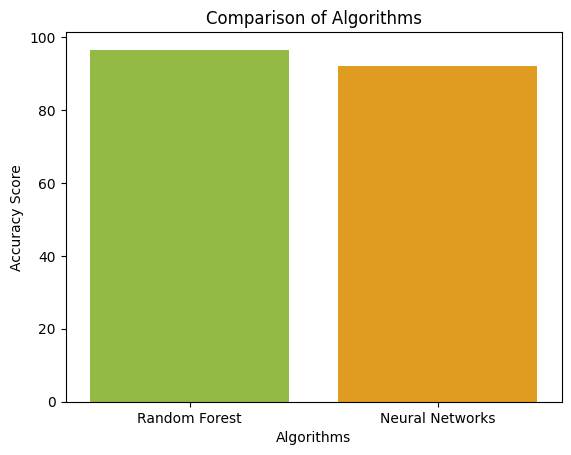

In [ ]:
algos = ['Random Forest', 'Neural Networks']
scores = [rf_score, ann_score]
sns.barplot(x = algos, y = scores, palette = ['yellowgreen', 'orange'])
plt.title("Comparison of Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()